# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

## Regression Model Evaluation

In [75]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
data.shape

(506, 14)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [27]:
data_model = LinearRegression()
data_model.fit(X_train, y_train)
y_pred = data_model.predict(X_test)
print(y_pred)

[[ 8.19466585]
 [32.74987596]
 [16.9450115 ]
 [23.02288665]
 [26.54941128]
 [35.29791721]
 [23.5934637 ]
 [ 9.33259617]
 [24.28469629]
 [22.08760972]
 [25.28665904]
 [25.07167395]
 [20.910484  ]
 [19.44309061]
 [31.46532361]
 [19.21244929]
 [38.30414726]
 [34.88291872]
 [18.22600327]
 [ 9.43685091]
 [11.75511113]
 [30.61339467]
 [35.87666059]
 [22.98817574]
 [21.47182771]
 [23.80189625]
 [10.87786281]
 [23.38353922]
 [19.86270876]
 [30.52514508]
 [18.5013311 ]
 [18.88082165]
 [24.76648047]
 [13.60723452]
 [23.64664597]
 [19.74753039]
 [33.4671277 ]
 [22.98117982]
 [17.2371642 ]
 [15.32573102]
 [22.94131138]
 [27.9319655 ]
 [22.02797466]
 [20.92368162]
 [38.66517232]
 [19.13405264]
 [15.81400194]
 [19.85535691]
 [19.77404223]
 [20.65310275]
 [21.98527591]
 [32.75667669]
 [29.27191169]
 [26.58246465]
 [23.57751239]
 [15.41902434]
 [19.54661698]
 [22.71958184]
 [18.96281716]
 [27.66799073]
 [20.30984541]
 [33.50885451]
 [21.61209236]
 [21.78586389]
 [15.47411414]
 [16.50973153]
 [37.64348

In [28]:
data_model.score(X_test,y_test)

0.632293132063849

## 3. Calculate and print R-squared for both the training and the testing set.

In [39]:
from sklearn.metrics import r2_score

y_pred2 = data_model.predict(X_train)
# primera predicción sobre el test
print(r2_score(y_test, y_pred))

# segunda predicción sobre el train
print(r2_score(y_train, y_pred2))

0.632293132063849
0.7670337389996618


## 4. Calculate and print mean squared error for both the training and the testing set.

In [35]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred)/100)
print(mean_squared_error(y_train, y_pred2)/100)

0.3828119614157199
0.1844395205783182


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [37]:
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_test, y_pred)/100)
print(mean_absolute_error(y_train, y_pred2)/100)

0.039638429046165775
0.030410683043293755


## Classification Model Evaluation

In [44]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)
data.shape

(150, 5)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [48]:
data_model = LogisticRegression(solver="lbfgs")
data_model.fit(X_train, y_train)
y_pred = data_model.predict(X_test)
print(y_pred)

[1 1 1 2 1 1 0 2 2 2 2 2 1 0 2 0 0 0 0 0 1 2 0 0 1 2 2 1 0 2]


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [52]:
y_pred2 = data_model.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred2))

0.9333333333333333
0.9583333333333334


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [54]:
print(balanced_accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_train, y_pred2))

0.9487179487179488
0.9587261680284936


## 10. Calculate and print the precision score for both the training and the testing set.

In [62]:
print(precision_score(y_test, y_pred,average='weighted'))
print(precision_score(y_train, y_pred2,average='weighted'))

0.9481481481481481
0.95859440267335


## 11. Calculate and print the recall score for both the training and the testing set.

In [63]:
print(recall_score(y_test, y_pred,average='weighted'))
print(recall_score(y_train, y_pred2,average='weighted'))

0.9333333333333333
0.9583333333333334


## 12. Calculate and print the F1 score for both the training and the testing set.

In [64]:
print(f1_score(y_test, y_pred,average='weighted'))
print(f1_score(y_train, y_pred2,average='weighted'))

0.9347222222222221
0.9583660130718954


## 13. Generate confusion matrices for both the training and the testing set.

In [66]:
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_train, y_pred2))

[[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]
[[40  0  0]
 [ 0 40  3]
 [ 0  2 35]]


[[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]


<AxesSubplot:>

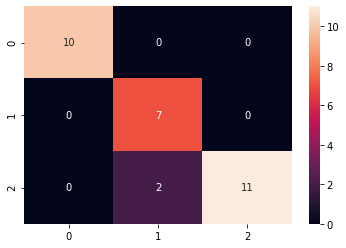

In [68]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

[[40  0  0]
 [ 0 40  3]
 [ 0  2 35]]


<AxesSubplot:>

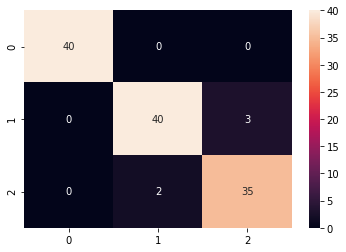

In [69]:
cm = confusion_matrix(y_train, y_pred2)
print(cm)

sns.heatmap(cm,annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [76]:
models = {
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training svm-linear...
Training svm-rbf...
Training randomforest...


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

Train complete


In [80]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred,average='weighted'))
    printMetric("Recall",recall_score(y_test, y_pred,average='weighted'))
    printMetric("F1Score",f1_score(y_test, y_pred,average='weighted'))

print("Train complete")

Evaluating model svm-linear
	 Accuracy: 0.933
	 Precision: 0.933
	 Recall: 0.933
	 F1Score: 0.933
Evaluating model svm-rbf
	 Accuracy: 0.233
	 Precision: 0.054
	 Recall: 0.233
	 F1Score: 0.088
Evaluating model randomforest
	 Accuracy: 0.933
	 Precision: 0.948
	 Recall: 0.933
	 F1Score: 0.935
Train complete


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_train, y_pred2))
    printMetric("Precision",precision_score(y_train, y_pred2,average='weighted'))
    printMetric("Recall",recall_score(y_train, y_pred2,average='weighted'))
    printMetric("F1Score",f1_score(y_train, y_pred2,average='weighted'))

print("Train complete")

Evaluating model svm-linear
	 Accuracy: 0.958
	 Precision: 0.959
	 Recall: 0.958
	 F1Score: 0.958
Evaluating model svm-rbf
	 Accuracy: 0.958
	 Precision: 0.959
	 Recall: 0.958
	 F1Score: 0.958
Evaluating model randomforest
	 Accuracy: 0.958
	 Precision: 0.959
	 Recall: 0.958
	 F1Score: 0.958
Train complete
